In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

In [4]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
titanic_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

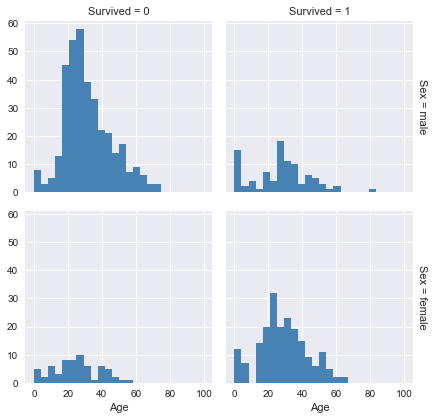

In [94]:
g = sns.FacetGrid(data=titanic_df, row="Sex", col="Survived", margin_titles=True)
bins = np.linspace(0, 100, 25)
g.map(plt.hist, "Age", color="steelblue", bins=bins, lw=0)

[(0, 1)]

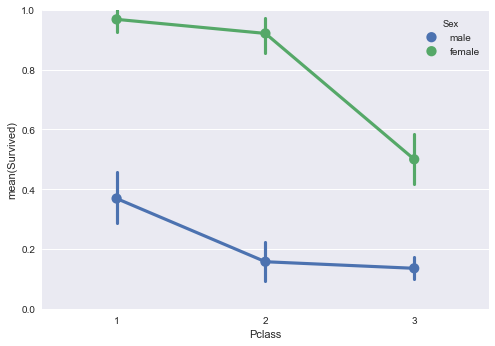

In [91]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df).set(ylim=(0, 1))

In [123]:
# create a new column that seperates out children and only keeps the sex of people > 16
titanic_df["CSex"] = titanic_df["Sex"].copy()
titanic_df["CSex"][titanic_df["Age"] <= 16] = 'child'

/Users/charlesdellinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


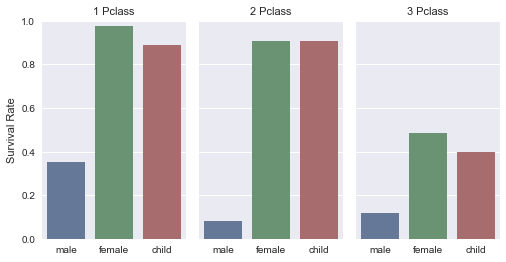

In [124]:
g = sns.factorplot(x="CSex", y="Survived", col="Pclass",
                   data=titanic_df, saturation=.5,
                   kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
#.set_xticklabels(["Male", "Female", "Child"])
 .set_titles("{col_name} {col_var}")
 .set(ylim=(0, 1))
 .despine(left=True))  

[(0, 1)]

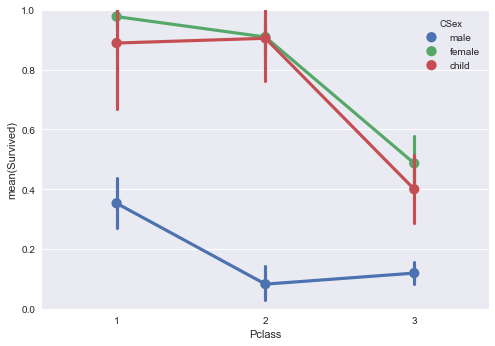

In [125]:
sns.pointplot(x="Pclass", y="Survived", hue="CSex", data=titanic_df).set(ylim=(0, 1))

In [126]:
titanic_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [127]:
pd.qcut(titanic_df["Fare"],4,labels=False)

0      0
1      3
2      1
3      3
4      1
5      1
6      3
7      2
8      1
9      2
10     2
11     2
12     1
13     3
14     0
15     2
16     2
17     1
18     2
19     0
20     2
21     1
22     1
23     3
24     2
25     3
26     0
27     3
28     0
29     0
      ..
861    1
862    2
863    3
864    1
865    1
866    1
867    3
868    1
869    1
870    0
871    3
872    0
873    1
874    2
875    0
876    1
877    0
878    0
879    3
880    2
881    0
882    1
883    1
884    0
885    2
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: int64

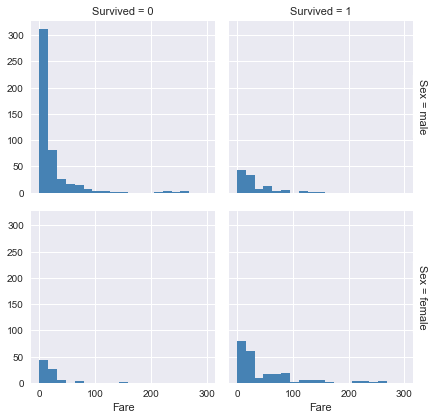

In [144]:
fare_plot = sns.FacetGrid(data=titanic_df, row="Sex", col="Survived", margin_titles=True)
fare_bins = np.linspace(titanic_df["Fare"].min(), 300, 20)
fare_plot.map(plt.hist, "Fare", color="steelblue", bins=fare_bins, lw=0)

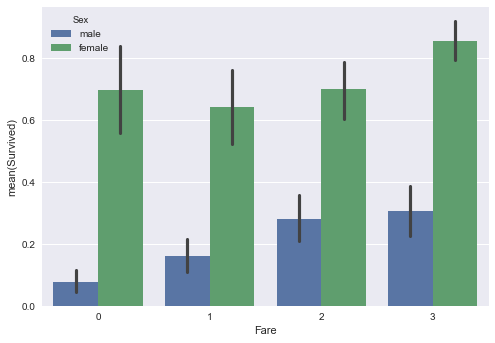

In [128]:
sns.barplot(x=pd.qcut(titanic_df["Fare"],4,labels=False), y="Survived", hue="Sex", data=titanic_df)

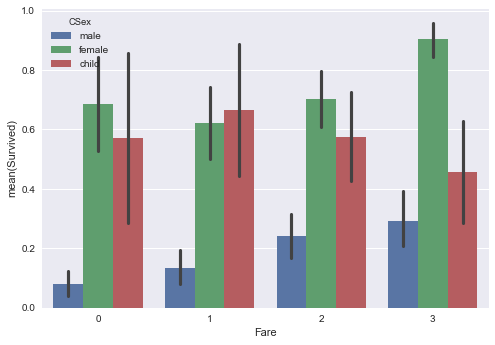

In [129]:
sns.barplot(x=pd.qcut(titanic_df["Fare"],4,labels=False), y="Survived", hue="CSex", data=titanic_df)

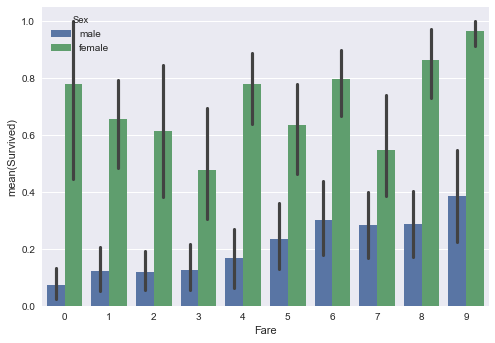

In [130]:
sns.barplot(x=pd.qcut(titanic_df["Fare"],10,labels=False), y="Survived", hue="Sex", data=titanic_df)

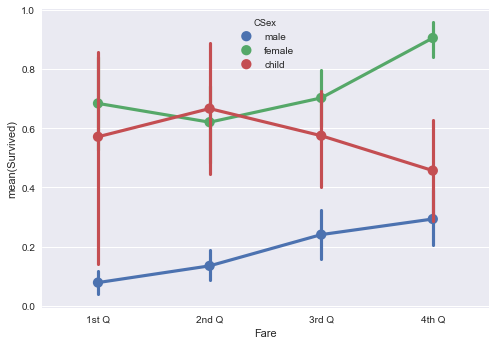

In [143]:
sns.pointplot(x=pd.qcut(titanic_df["Fare"],4,labels=False), y="Survived", hue="CSex", data=titanic_df).set_xticklabels(["1st Q", "2nd Q", "3rd Q", "4th Q"])#.set(ylim=(0, 1))

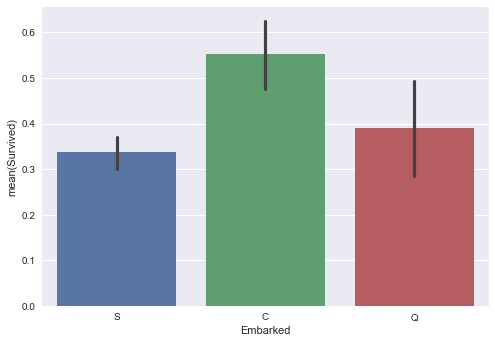

In [132]:
sns.barplot(x="Embarked", y="Survived", data=titanic_df)

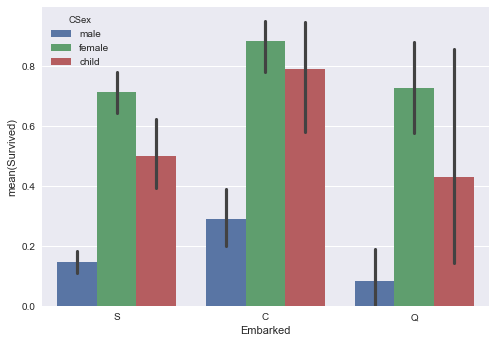

In [133]:
sns.barplot(x="Embarked", y="Survived", hue="CSex", data=titanic_df)

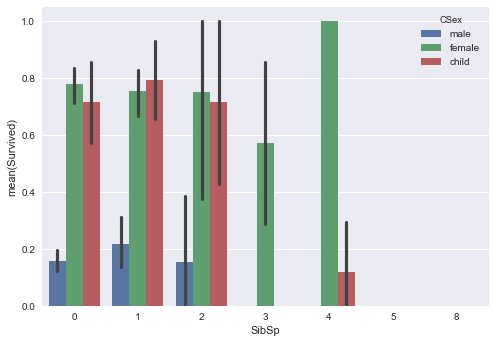

In [191]:
sns.barplot(x='SibSp', y='Survived', hue='CSex', data=titanic_df)

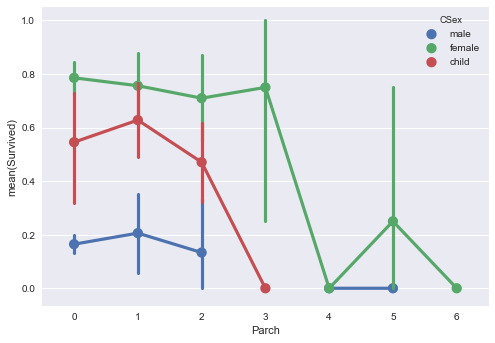

In [168]:
sns.pointplot(x='Parch', y='Survived', hue='CSex', data=titanic_df)

In [170]:
titanic_df['FamSize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [180]:
# get the mean survival based on siblings/spouse, parents/children, and total family size
siblings_spouse = titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)
parents_children = titanic_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)
family_size = titanic_df[['FamSize', 'Survived']].groupby(['FamSize'], as_index=False).mean().sort_values(by='FamSize', ascending=True)
# since the survival was saved as variable to graph, they need to be printed them
print siblings_spouse, '\n' * 2, parents_children, '\n' * 2, family_size

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 

   FamSize  Survived
0        1  0.303538
1        2  0.552795
2        3  0.578431
3        4  0.724138
4        5  0.200000
5        6  0.136364
6        7  0.333333
7        8  0.000000
8       11  0.000000


In [190]:
# Check quantities to make sure none of the percent survival values have a quantity of zero
for label in ['SibSp', 'Parch', 'FamSize']:
    print titanic_df[[label, 'Survived']]\
          .groupby([label], as_index=False)\
          .count().sort_values(by=label, ascending=True)

   SibSp  Survived
0      0       608
1      1       209
2      2        28
3      3        16
4      4        18
5      5         5
6      8         7
   Parch  Survived
0      0       678
1      1       118
2      2        80
3      3         5
4      4         4
5      5         5
6      6         1
   FamSize  Survived
0        1       537
1        2       161
2        3       102
3        4        29
4        5        15
5        6        22
6        7        12
7        8         6
8       11         7


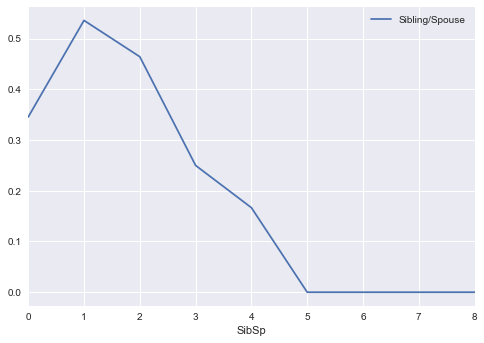

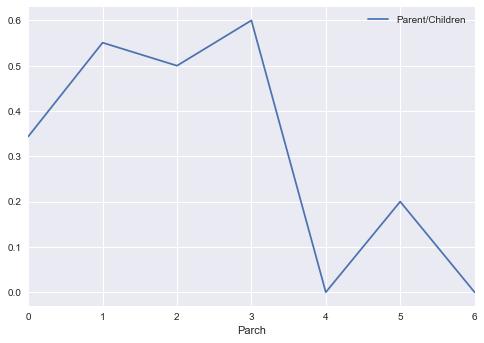

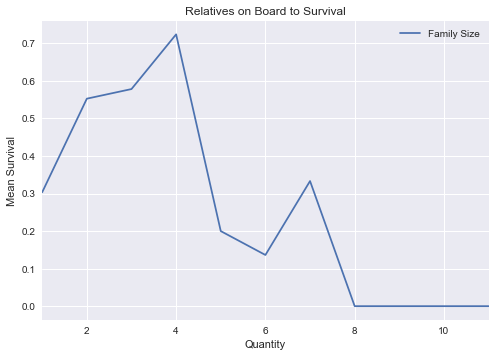

In [196]:
siblings_spouse.plot(x='SibSp',y='Survived', label='Sibling/Spouse')
parents_children.plot(x='Parch',y='Survived', label='Parent/Children')
family_size.plot(x='FamSize',y='Survived', label='Family Size')
plt.title('Relatives on Board to Survival')
plt.xlabel('Quantity')
plt.ylabel('Mean Survival')
plt.legend(loc='upper right')
plt.show()